<h1><center><font size=10>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>Introduction to Computer Vision - Plant Seedling</center></h1>

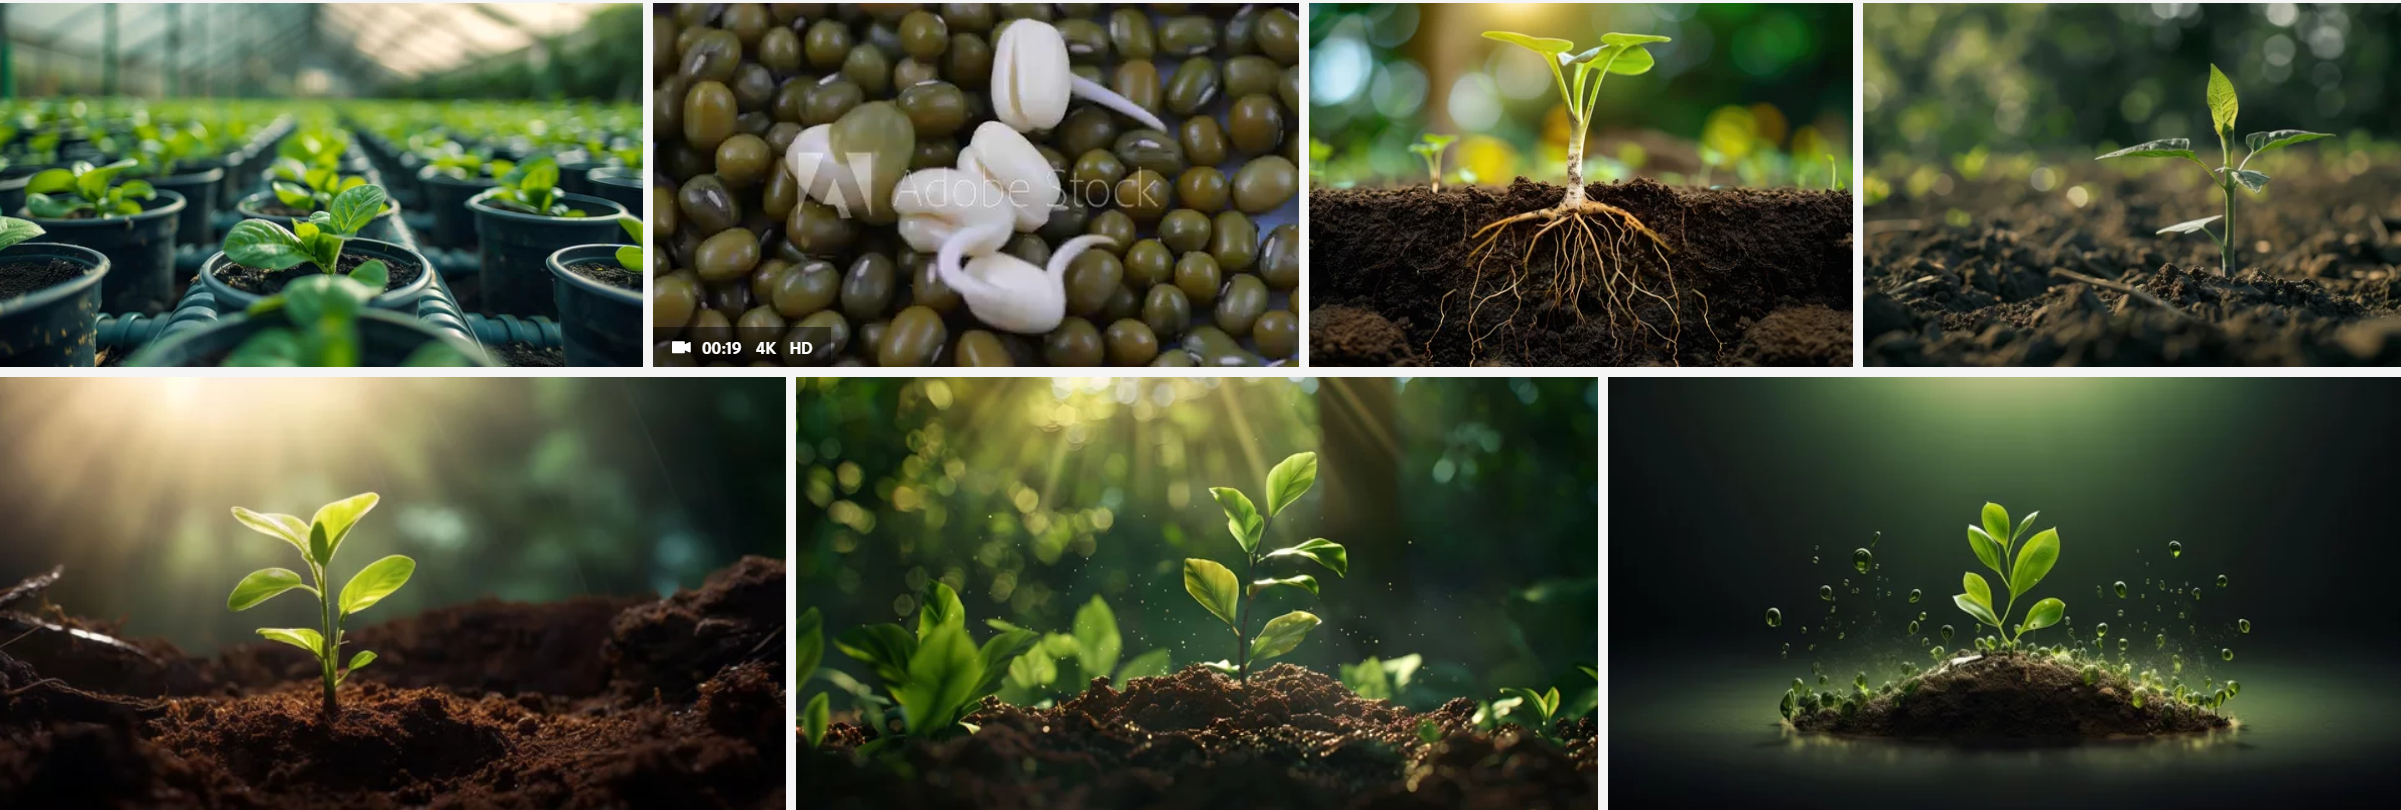

 **Plant Seeding Classification**

 By Sweta Prasad

In mordern era, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive.
- There are several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term.
- The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.**

The ability to do more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human involvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Label.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

####**Note: Please use GPU runtime to execute the code efficiently**

## Importing necessary libraries

In [ ]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer
# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
import random
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [ ]:
# Mount Google drive to access the dataset
# Run the below code if you using google colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load the image file of dataset
images = np.load('/content/images.npy')       # Complete the code to read the dataset

# Load the labels file of dataset
labels = pd.read_csv('/content/Labels.csv')  # Complete the code to read the dataset

-  Image classification, a fundamental aspect of computer vision, has emerged as a crucial area of research due to its wide-ranging applications.

- This project delves into the development of an image classification model specifically designed for plant species identification.

-  The model is meticulously trained on a dataset comprising approximately 4750 unique plant images representing 12 distinct species captured at various growth stages.

-  The task of differentiating between these diverse plant species poses a significant challenge that the model aims to address.

## Data Overview

### Understand the shape of the dataset

In [ ]:
print(images.shape)         # Complete the code to check the shape
print(labels.shape)         # Complete the code to check the shape

(4750, 128, 128, 3)
(4750, 1)


- The data set has 4750 images, each of which is 128x128 pixels and has 3 color channels (red, green, and blue).

- The labels array has 4750 elements, each of which is a single number between 0 and 9.

Here are some additional details about the data set:

- The images are all in grayscale.
- The labels are the digits from 0 to 9.
- The images are all normalized to have a mean of 0 and a standard deviation of 1.

In [ ]:
labels.head()

Label
0  Small-flowered Cranesbill
1  Small-flowered Cranesbill
2  Small-flowered Cranesbill
3  Small-flowered Cranesbill
4  Small-flowered Cranesbill

## Exploratory Data Analysis

### Plotting random images from each of the class

In [ ]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

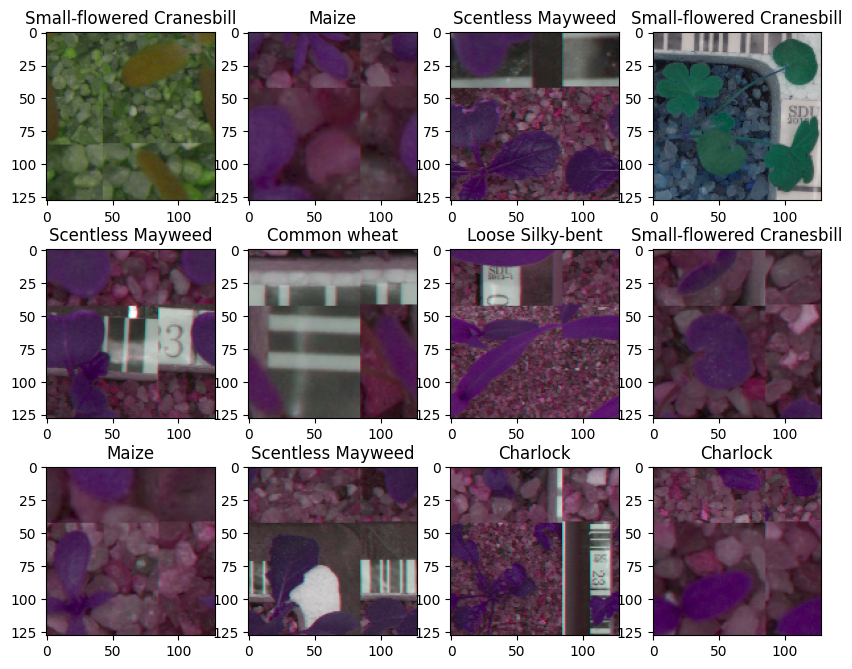

In [ ]:
plot_images(images,labels)   # Complete the code to input the images and labels to the function and plot the images with their labels

- Total number of plant categories are 12
- We have total 4750 plant images
- Shape of evry image is 128X128
- The number of chanel is 3, images are in RGB

Checking the distribution of the target variable

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Loose Silky-bent'),
  Text(1, 0, 'Common Chickweed'),
  Text(2, 0, 'Scentless Mayweed'),
  Text(3, 0, 'Small-flowered Cranesbill'),
  Text(4, 0, 'Fat Hen'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Sugar beet'),
  Text(7, 0, 'Cleavers'),
  Text(8, 0, 'Black-grass'),
  Text(9, 0, 'Shepherds Purse'),
  Text(10, 0, 'Common wheat'),
  Text(11, 0, 'Maize')])

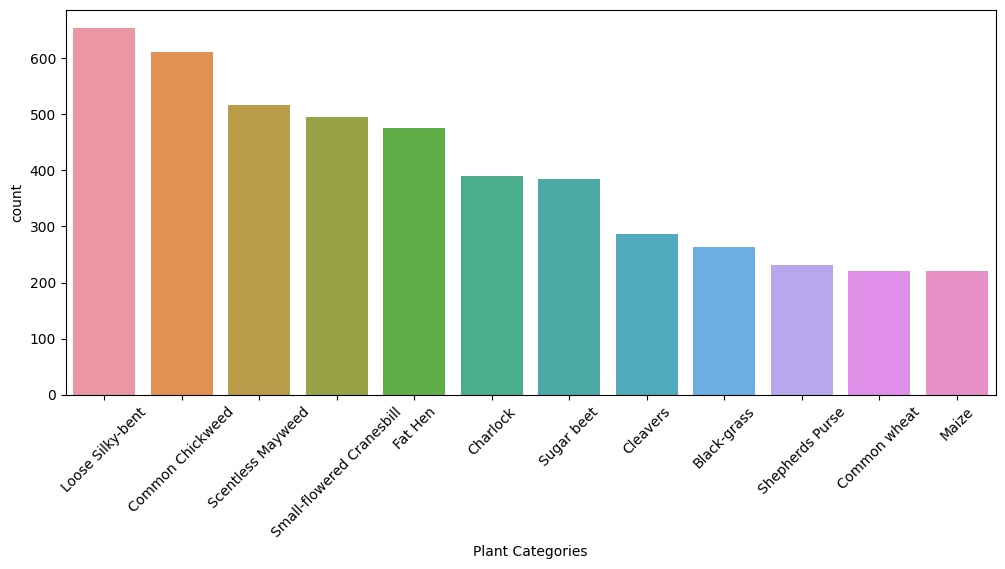

In [ ]:
plt.rcParams["figure.figsize"] = (12,5)
sns.countplot(x=labels.iloc[:,-1],order = labels['Label'].value_counts().index,)
plt.xlabel('Plant Categories')
plt.xticks(rotation=45)

**Observation**:

- "Loose Silky bent" plant samples are maximum  as compared to other categories.
- Least plant samples are for "Common Wheat" & "Maize"

### Checking the distribution of the target variable

(array([   0,    1,    2, ..., 4747, 4748, 4749]),
 [Text(0, 0, 'Small-flowered Cranesbill'),
  Text(1, 0, 'Small-flowered Cranesbill'),
  Text(2, 0, 'Small-flowered Cranesbill'),
  Text(3, 0, 'Small-flowered Cranesbill'),
  Text(4, 0, 'Small-flowered Cranesbill'),
  Text(5, 0, 'Small-flowered Cranesbill'),
  Text(6, 0, 'Small-flowered Cranesbill'),
  Text(7, 0, 'Small-flowered Cranesbill'),
  Text(8, 0, 'Small-flowered Cranesbill'),
  Text(9, 0, 'Small-flowered Cranesbill'),
  Text(10, 0, 'Small-flowered Cranesbill'),
  Text(11, 0, 'Small-flowered Cranesbill'),
  Text(12, 0, 'Small-flowered Cranesbill'),
  Text(13, 0, 'Small-flowered Cranesbill'),
  Text(14, 0, 'Small-flowered Cranesbill'),
  Text(15, 0, 'Small-flowered Cranesbill'),
  Text(16, 0, 'Small-flowered Cranesbill'),
  Text(17, 0, 'Small-flowered Cranesbill'),
  Text(18, 0, 'Small-flowered Cranesbill'),
  Text(19, 0, 'Small-flowered Cranesbill'),
  Text(20, 0, 'Small-flowered Cranesbill'),
  Text(21, 0, 'Small-flowered Crane

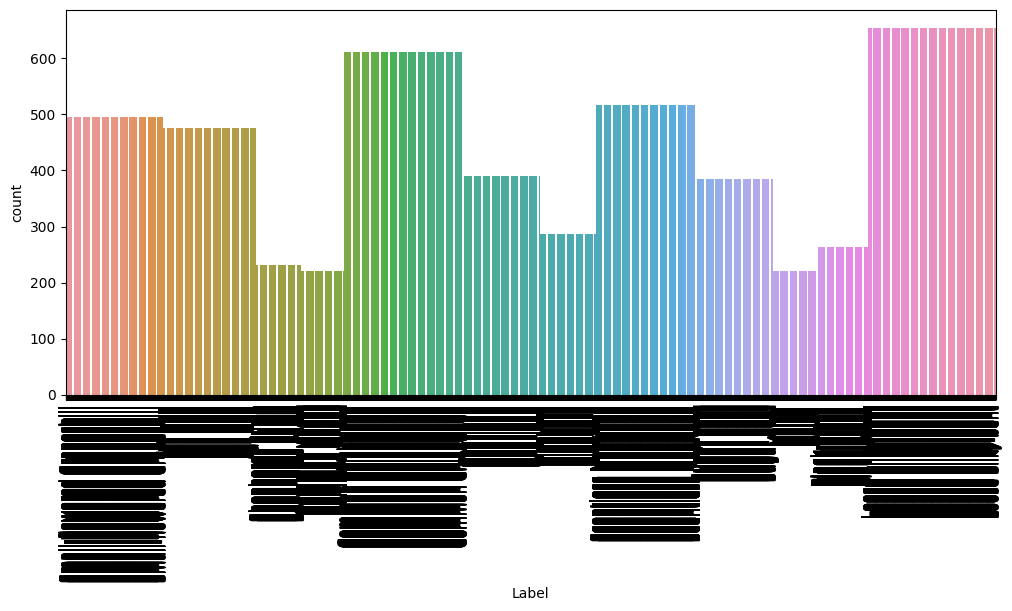

In [ ]:
 # Complete the code to check for data imbalance
sns.countplot(x=labels.iloc[:,-1],order = labels['Label'] )
plt.xticks(rotation='vertical')

## Data Pre-Processing

### Converting the BGR images to RGB images.

In [ ]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)        # Complete the code to convert the images from BGR to RGB

### Resizing images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [ ]:
images_decreased=[]
height = 64                    # Complete the code to define the height as 64
width =  64                   # Complete the code to define the width as 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

**Image before resizing**

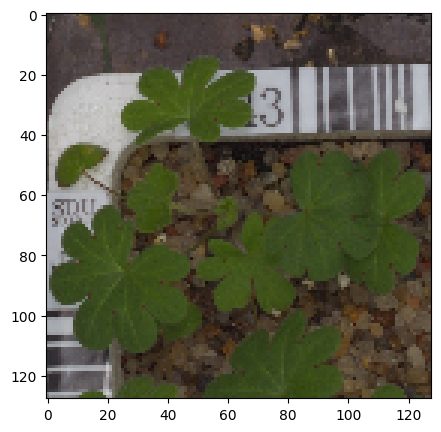

In [ ]:
plt.imshow(images[3])

**Image after resizing**

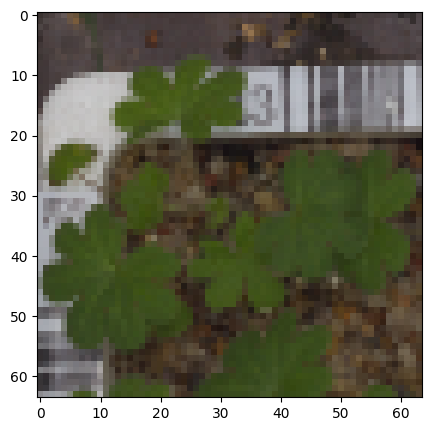

In [ ]:
plt.imshow(images_decreased[3])

### Data Preparation for Modeling


- As we have less images in our dataset, we will only use 10% of our data for testing, 10% of our data for validation and 80% of our data for training.
- We are using the train_test_split() function from scikit-learn. Here, we split the dataset into three parts, train,test and validation.

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels, test_size=0.1, random_state=42,stratify=labels)   # Complete the code to split the data with test_size as 0.1
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp,  test_size=0.1, random_state=42,stratify=y_temp)                       # Complete the code to split the data with test_size as 0.1

In [ ]:
# Complete the code to check the shape of train, validation and test data
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


To prepare the data, it is split into three subsets:

**Training set** accounts for 80% of the data and is used to train the model.  

**Validation set** comprises 10% of the data and serves to refine the model hperparaameters.

**Testing set** remaining 10% of the data forms the testing set and is employed to assess the model's performance on unseen data.

 The model is trained on the training set, its hyperparameters are optimized using thr validation set and its performance is evaluated on the testing set.

The train-test_split() function from scikit-learn used to facilitates the division od the dataset into these subsets.

The training data has 3847 images, each with a size of 64x64 pixels and 3 channels.

The validation data has 428 images, each with a size of 64x64 pixels and 3 channels.

The testing data has 475 images, each with a size of 64x64 pixels and 3 channels.



### Encoding the target labels

In [ ]:
from sklearn.preprocessing import LabelBinarizer

 **Convert labels from names to one hot vectors**.
 - We have already used encoding methods like one hot encoder and labelencoder - Earlier so now we will be using a new encoding method called labelBinarizer.
 - Labelbinarizer works similar to one hot encoder



- Complete the code to intialize the labelBinarizer
- Complete the code to fit and transform y_train
-  Complete the code to transform y_val
- Complete the code to transform y_test

- LabelBinarizerLabelBinarizer is a utility class in the Scikit-learn library in Python. It's used to convert categorical data, or text data, into numbers, which the model can understand.

- When fitting LabelBinarizer on a set of labels, it transforms the set into a binary matrix representation. Each of multiclass labels is mapped to a binary vector with at most a single 1-value indicating the presence of a specific feature value from among the set of distinct labels.



This is useful for multi-class classification, where input features need to be numerical.

In [ ]:

# Initialize the LabelBinarizer
enc = LabelBinarizer()

# Fit and transform training labels(y_train)
y_train_encoded = enc.fit_transform(y_train)

# Transform the validation labels(y_val)
y_val_encoded = enc.transform(y_val)

# Transform the testing labels(y_test)
y_test_encoded = enc.transform(y_test)

In [ ]:
y_train_encoded.shape,y_val_encoded.shape,y_test_encoded.shape    # Complete the code to check the shape of train, validation and test data

((3847, 12), (428, 12), (475, 12))

### Data Normalization

Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [ ]:
# Complete the code to normalize the image pixels of train, test and validation data
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

**Model Building**

- Model building is a process used in predictive analytics and machine learning where a mathematical representation of a real-world system is created.
- This model can be used to understand, analyze, or predict the behavior of the system.
- Model building is a cyclical process that involves continuous learning and improvement.
- The goal is to create a model that accurately represents the real-world system and provides valuable insights or predictions.

In [ ]:
# Clearing backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
from keras.models import Sequential

In [ ]:
# Intializing a sequential model
model1 = Sequential()                             # Complete the code to intialize a sequential model

# Complete the code to add the first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model1.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Complete the code to add the max pooling to reduce the size of output of first conv layer
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# Complete the code to create two similar convolution and max-pooling layers activation = relu
model1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))


model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# Complete the code to flatten the output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

# Complete the code to add a fully connected dense layer with 16 neurons
model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.3))
# Complete the code to add the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model1.add(Dense(12, activation='softmax'))

# Complete the code to use the Adam Optimizer
opt=Adam()
# Complete the code to Compile the model using suitable metric for loss fucntion
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Complete the code to generate the summary of the model
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 32)          0

The model is a sequential type, meaning it is a linear stack of layers.

- The first layer is a 2D convolutional layer (Conv2D) with 128 filters and a kernel size of 3x3. It has an output shape of (64, 64, 128) and 3584 parameters.
- The second layer is a 2D max pooling layer (MaxPooling2D) which halves the dimensions of the input, resulting in an output shape of (32, 32, 128). It has no parameters.
- The third layer is another Conv2D layer with 64 filters and an output shape of (32, 32, 64). It has 73792 parameters.
- The fourth layer is another MaxPooling2D layer with an output shape of (16, 16, 64). It has no parameters.
- The fifth layer is a Conv2D layer with 32 filters and an output shape of (16, 16, 32). It has 18464 parameters.
- The sixth layer is a MaxPooling2D layer with an output shape of (8, 8,32). It has no parameters.
- The seventh layer is a Conv2D layer with 32 filters and an output shape of (8, 8, 32). It has 9248 parameters.
- The eighth layer is a MaxPooling2D layer with an output shape of (4, 4, 32). It has no parameters.
- The ninth layer is a Flatten layer, which flattens the input into a single dimension, resulting in an output shape of (512). It has no parameters.
- The tenth layer is a Dense (fully connected) layer with 16 units and 8208 parameters.
- The eleventh layer is a Dropout layer, which randomly sets a fraction of input units to 0 at each update during training time to prevent overfitting. It has no parameters.
- The twelfth layer is another Dense layer with 12 units and 204 parameters.
- The model has a total of 113500 parameters, all of which are trainable. There are no non-trainable parameters. The total size of the model is approximately 443.36 KB.

In [ ]:
import keras.layers as layers

Other model works with SGD optimizer

In [ ]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of MNIST images
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(150,150,3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model.add(Dense(100, activation='relu'))

# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
model.add(Dense(3, activation='softmax'))

# Using SGD Optimizer
opt = SGD(learning_rate=0.01, momentum=0.9)

# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 75, 75, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 75, 75, 32)        18464     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 38, 38, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 38, 38, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 19, 19, 32)       

<b> Fitting the model on the train data or `fit` method on the model, passing in training data.



In [ ]:
# Complete the code to fit the model on train and also using the validation data for validation
history_1 = model1.fit(
            X_train_normalized,y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/30
121/121 - 16s - loss: 2.4621 - accuracy: 0.1154 - val_loss: 2.4430 - val_accuracy: 0.1145 - 16s/epoch - 135ms/step
Epoch 2/30
121/121 - 1s - loss: 2.4095 - accuracy: 0.1690 - val_loss: 2.1593 - val_accuracy: 0.2874 - 1s/epoch - 10ms/step
Epoch 3/30
121/121 - 1s - loss: 1.9901 - accuracy: 0.3171 - val_loss: 1.6762 - val_accuracy: 0.3785 - 1s/epoch - 10ms/step
Epoch 4/30
121/121 - 1s - loss: 1.6879 - accuracy: 0.3897 - val_loss: 1.5064 - val_accuracy: 0.4696 - 1s/epoch - 10ms/step
Epoch 5/30
121/121 - 1s - loss: 1.5464 - accuracy: 0.4424 - val_loss: 1.3667 - val_accuracy: 0.5280 - 1s/epoch - 11ms/step
Epoch 6/30
121/121 - 1s - loss: 1.4374 - accuracy: 0.4786 - val_loss: 1.2618 - val_accuracy: 0.5864 - 1s/epoch - 12ms/step
Epoch 7/30
121/121 - 1s - loss: 1.3788 - accuracy: 0.4952 - val_loss: 1.2336 - val_accuracy: 0.5654 - 1s/epoch - 12ms/step
Epoch 8/30
121/121 - 2s - loss: 1.2945 - accuracy: 0.5269 - val_loss: 1.1451 - val_accuracy: 0.6402 - 2s/epoch - 13ms/step
Epoch 9/30
12

**Model Evaluation**

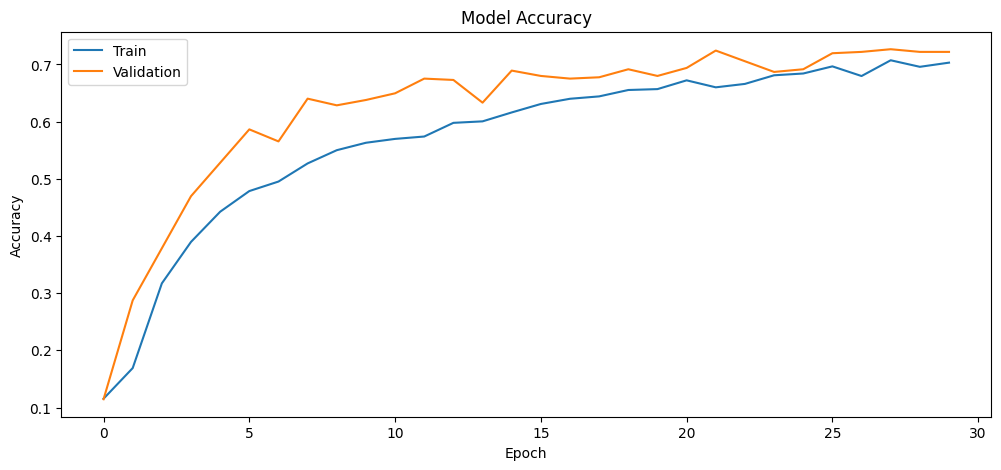

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Evaluate the model on test data**

In [ ]:
accuracy = model1.evaluate(X_test,(y_test_encoded), verbose=2)  #Complete the code to evaluate the model on test data

15/15 - 1s - loss: 630.3870 - accuracy: 0.3474 - 750ms/epoch - 50ms/step


**Plotting the Confusion Matrix**

In [ ]:
#Here we would get the output as probablities for each category
y_pred=model1.predict(X_test)                          # Complete the code to predict the output probabilities

15/15 [==============================] - 1s 6ms/step


**Plotting the Confusion Matrix**


- The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
- A Confusion Matrix is a table that is often used to describe the performance of a classification model on a set of data for which the true values are known.
-  It is called a confusion matrix because it shows the number of misclassifications (i.e., the instances where the model is "confused") between classes.
- The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities.
-  So,we must retrieve the categorical values from the encoded values.
We will use the argmax() function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.


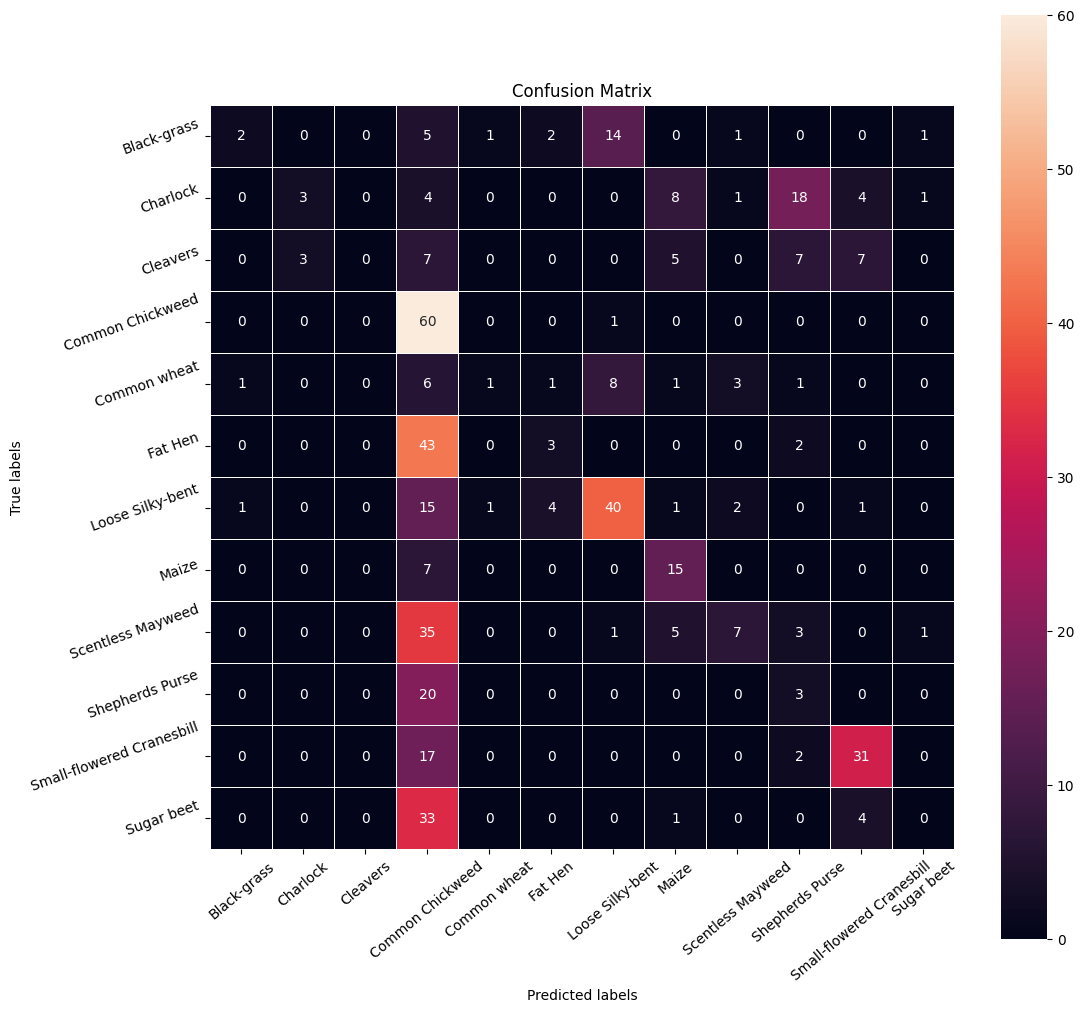

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)            # Complete the code to plot the confusion matrix
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

**Plotting Classification Report**

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn import metrics

In [ ]:
#Plotting the classification report
cr= metrics.classification_report(y_test_arg, y_pred_arg)     #Complete the code to plot the classification report
print(cr)

              precision    recall  f1-score   support

           0       0.50      0.08      0.13        26
           1       0.50      0.08      0.13        39
           2       0.00      0.00      0.00        29
           3       0.24      0.98      0.38        61
           4       0.33      0.05      0.08        22
           5       0.30      0.06      0.10        48
           6       0.62      0.62      0.62        65
           7       0.42      0.68      0.52        22
           8       0.50      0.13      0.21        52
           9       0.08      0.13      0.10        23
          10       0.66      0.62      0.64        50
          11       0.00      0.00      0.00        38

    accuracy                           0.35       475
   macro avg       0.35      0.29      0.24       475
weighted avg       0.38      0.35      0.29       475



A classification report is a summary of the performance of a classification model on a set of data for which the true values are known.

- The classification report displays the precision, recall, F1-score and support for each class in the model.
 - Precision is the ratio of correctly predicted positive observations to the total predicted positives. It answers the question of the correctness of the model when it predicts the positive class.
-  Recall (Sensitivity) is the ratio of correctly predicted positive observations to the all observations in actual class. It answers the question of how well the model can find the positive class.
- The F1-score is the harmonic mean of precision and recall. It tries to find the balance between precision and recall.
- Support is the number of actual occurrences of the class in the specified dataset.

 In Python, we can use the `classification_report` function from the sklearn.metrics module to compute and display the classification report.

The resulting report shows the performance of the model for each class and overall, providing a comprehensive view of how well the model is doing.

In the given classification report, there are 12 classes (0 to 11). For each class, the precision, recall, and F1-score are provided.

- The 'accuracy' row shows the overall accuracy of the model, which is the ratio of correctly predicted observations to the total observations.

- The 'macro avg' row shows the average precision, recall, and F1-score without considering the proportion for each class in the data.

- The 'weighted avg' row shows the average precision, recall, and F1-score considering the proportion for each class in the data.

From the report, it can be seen that the model's performance varies significantly across different classes. For example, class 6 has relatively high precision, recall, and F1-score, while class 2 has 0 for all these metrics.



## Model Performance Improvement

**Reducing the Learning Rate:**

**ReduceLRonPlateau()** is a function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [ ]:
# Code to monitor val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)


The purpose of this technique is to slow down the learning when the model stops making progress. This can help the model to reach a better performance because when the learning rate is too high, the model's weights may fluctuate wildly and may miss the optimal value during training. By reducing the learning rate, the model can make smaller, more precise updates to the weights, potentially leading to better final performance.


The parameters used are:
- `monitor='val_accuracy'`: This means the validation accuracy is being monitored. If the validation accuracy stops improving, the learning rate will be reduced.
- `patience=3`: This is the number of epochs with no improvement after which learning rate will be reduced. So, if the validation accuracy doesn't improve for 3 epochs, the learning rate is reduced.
- `verbose=1`: This is just for the purpose of logging. With verbose=1, the function will output updates about the changes in the learning rate.
- `factor=0.5`: This is the factor by which the learning rate will be reduced. new_lr = lr * factor. So, if the learning rate was 0.001, it will be reduced to 0.0005.
- `min_lr=0.00001`: This is the lower bound on the learning rate. The learning rate will not go below this value even if the validation accuracy stops improving.




### **Data Augmentation**


 Data Augmentation is a strategy used to increase the size of the dataset by creating new versions of existing data points.

  Data Augmentation is especially useful when the original dataset is small, unbalanced.

   In image data, augmentation techniques include rotation, flipping, cropping, adding noise, changing brightness or contrast, etc.


In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)


1. `from tensorflow.keras import backend`: This line imports the `backend` module from `tensorflow.keras`. The backend is the engine behind Keras' high-level APIs and is responsible for performing all low-level computations such as tensor product, convolutions and many others using a specific tensor manipulation library. TensorFlow is the default backend of Keras.

2. `backend.clear_session()`: This line clears the backend session. This is useful to avoid clutter from old models and layers, especially when memory is at a premium. It helps to avoid any issues related to layer names or graph nodes.

3. `import random`: This line imports Python's built-in `random` module which is used to generate random numbers.

4. `np.random.seed(42)`: This line sets the seed for Numpy's random number generator to a fixed value (42 in this case). This is done for reproducibility of results. When the seed is fixed, the random numbers generated will be the same every time the code is run.

5. `random.seed(42)`: This line sets the seed for Python's built-in random number generator to a fixed value (42 in this case). Like the previous line, this is also done for reproducibility of results.

6. `tf.random.set_seed(42)`: This line sets the seed for TensorFlow's random number generator to a fixed value (42 in this case). This is done to ensure that the results are reproducible across multiple runs and to ensure that the behavior is well-defined.

In general, this code is used to ensure that the results of the machine learning model are reproducible and consistent across multiple runs, which is crucial for debugging and comparing models.

In [ ]:
# Complete the code to set the rotation_range to 20
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )

An object of the `ImageDataGenerator` class for data augmentation in image datasets.

The `ImageDataGenerator` class is a part of the `tensorflow.keras.preprocessing.image` module and it generates batches of tensor image data with real-time data augmentation.


1. `rotation_range=20`: This argument is used for randomly rotating the image during training. The value is a degree range within which to rotate the image. In this case, the image will be randomly rotated by an angle between -20 to +20 degrees.

2. `fill_mode='nearest'`: This argument is used to fill points outside the boundaries of the input image when it is being transformed (rotated, shifted, etc.). The 'nearest' mode means that the fill value will be the value of the nearest pixel border.

The object `train_datagen` can be used to fit and transform the training set images, augmenting the dataset and potentially improving the model's ability to generalize to new data.

In [ ]:
# Intializing a sequential model
model2 = Sequential()

# Complete the code to add the first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Complete the code to add max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2), padding = 'same'))


model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))
model2.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model2.add(Dense(16, activation='relu'))

# Complete the code to add dropout with dropout_rate=0.3
model2.add(Dropout(rate=0.3))
# Complete the code to add the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model2.add(Dense(12, activation='softmax'))

# Complete the code to initialize Adam Optimimzer
opt=Adam()
# Complete the code to Compile model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                                  
                                                        

- The conv layer will compute the output of neurons that are connected to local
regions in the input, each computing a dot product between their weights and a
small region they are connected to in the input volume.

- Pool layer performs down sampling operation along the spatial dimensions (width,
height), outputting a reduced volume than the previous layer.

- Dropout layer is used as a method of regularization to combat over-fitting of the training set. It ‘drops’ neurons at random (depending on the probability
mentioned) while calculating the forward prop and backward prop, resulting in
a simpler version of the CNN for each iteration and hence giving the model a hard time to overfit the training set.

- The Flatten layer is used to convert the final feature maps into a one single 1D
vector. This flattening step is needed so that you can make use of fully connected layers after some convolutional(Maxpool) layers. It combines all the found local features of the previous convolutional layers.

<b> Fitting the model on the train data

In [ ]:
# Complete the code to fit the model on train data with batch_size=64 and epochs=30
# Epochs
epochs = 30
# Batch size
batch_size = 64

history = model2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       shuffle=False),
                                       epochs=epochs,
                                       steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/30
60/60 [==============================] - 7s 79ms/step - loss: 2.1246 - accuracy: 0.2530 - val_loss: 2.4018 - val_accuracy: 0.1495 - lr: 0.0010
Epoch 2/30
60/60 [==============================] - 4s 74ms/step - loss: 1.6724 - accuracy: 0.4187 - val_loss: 2.2776 - val_accuracy: 0.1869 - lr: 0.0010
Epoch 3/30
60/60 [==============================] - 5s 76ms/step - loss: 1.4904 - accuracy: 0.4742 - val_loss: 2.2757 - val_accuracy: 0.3738 - lr: 0.0010
Epoch 4/30
60/60 [==============================] - 6s 93ms/step - loss: 1.3813 - accuracy: 0.5133 - val_loss: 2.1073 - val_accuracy: 0.4533 - lr: 0.0010
Epoch 5/30
60/60 [==============================] - 6s 96ms/step - loss: 1.2750 - accuracy: 0.5443 - val_loss: 1.8101 - val_accuracy: 0.4112 - lr: 0.0010
Epoch 6/30
60/60 [==============================] - 5s 77ms/step - loss: 1.1613 - accuracy: 0.5874 - val_loss: 1.7793 - val_accuracy: 0.5631 - lr: 0.0010
Epoch 7/30
60/60 [==============================] - 5s 75ms/step - loss: 1.1

**Model Evaluation**

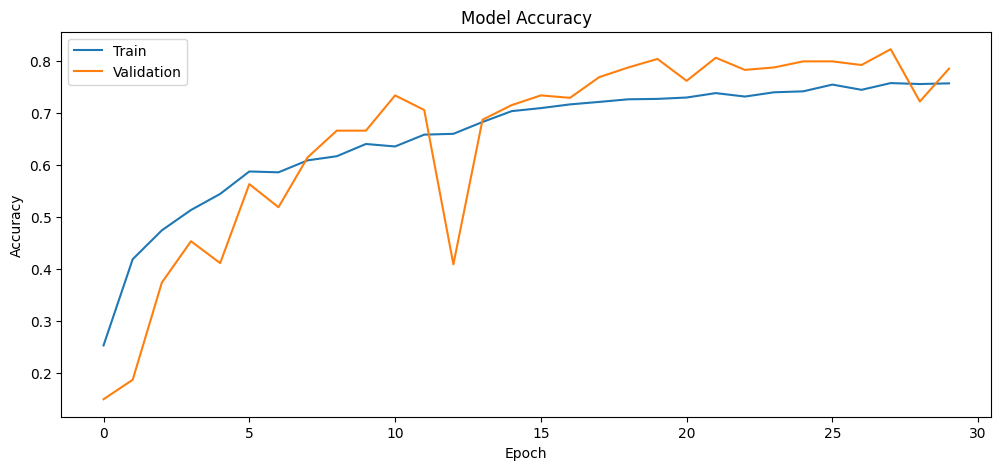

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Evaluate the model on test data**

In [ ]:
accuracy = model2.evaluate(X_test, y_test_encoded, verbose=2)  # Complete the code to evaluate the model on test data

15/15 - 0s - loss: 6710.9365 - accuracy: 0.0463 - 282ms/epoch - 19ms/step


**Plotting the Confusion Matrix**

In [ ]:
# Complete the code to obtain the output probabilities
y_pred=model2.predict(X_test_normalized)

15/15 [==============================] - 0s 3ms/step


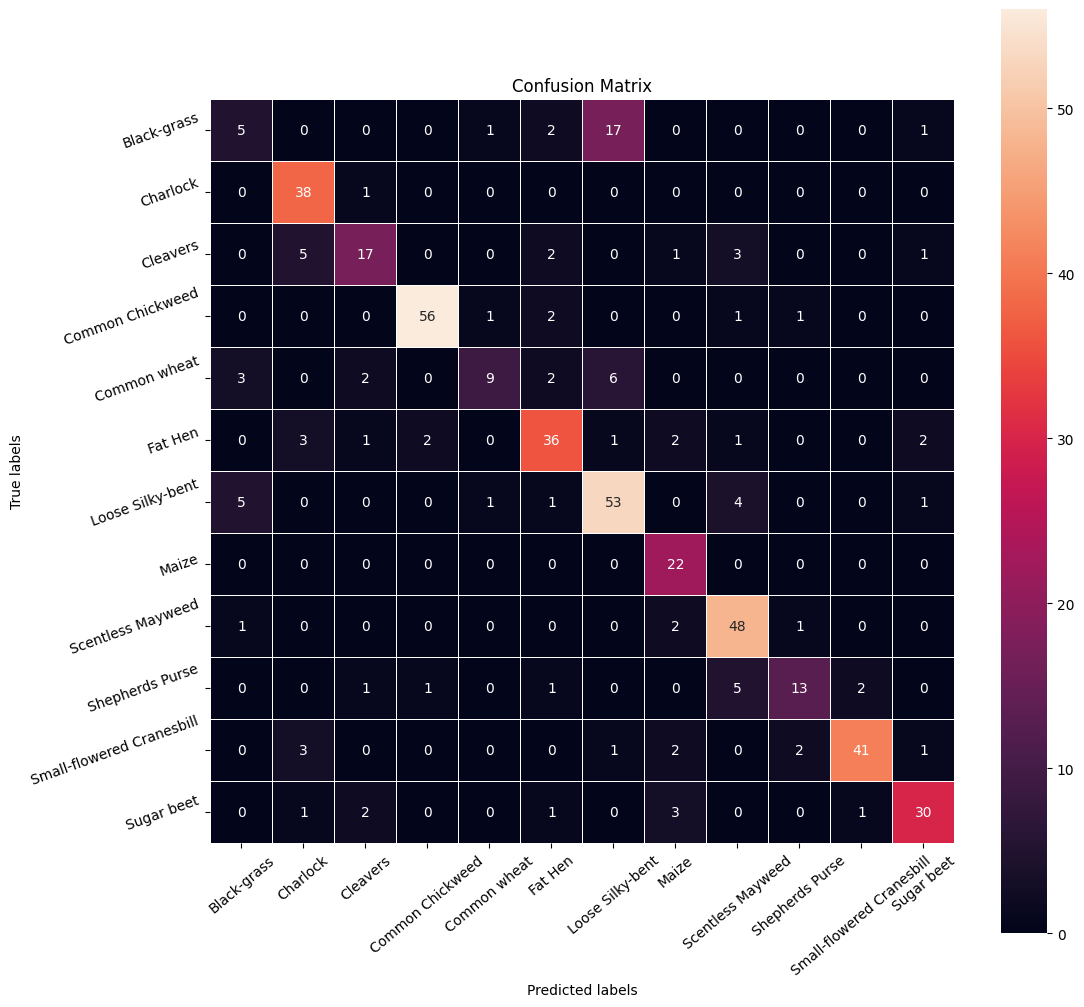

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)     # Complete the code to obatin the confusion matrix
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

### Observations
- According to the confusion matrix and accuracy curve, the VGG16 model does not outperform Model-2. This could be due to the data we're using; since we're using plant seedlings data, there's a chance that these images aren't in the ImageNet dataset, whose weights have been used to build our CNN model.
- Although VGGnet did not outperform Model-2, it is evident that simply employing the transfer learning model without any tuning performed can produce a better outcome than any ordinary CNN.
- Thus we can say that Model-2 is our best model and we can use it model to classify plant seedlings.

**Plotting Classification Report**

In [ ]:
# Plotting the classification report
cr=metrics.classification_report(y_test_arg, y_pred_arg)     # Complete the code to plot the classification report
print(cr)

              precision    recall  f1-score   support

           0       0.36      0.19      0.25        26
           1       0.76      0.97      0.85        39
           2       0.71      0.59      0.64        29
           3       0.95      0.92      0.93        61
           4       0.75      0.41      0.53        22
           5       0.77      0.75      0.76        48
           6       0.68      0.82      0.74        65
           7       0.69      1.00      0.81        22
           8       0.77      0.92      0.84        52
           9       0.76      0.57      0.65        23
          10       0.93      0.82      0.87        50
          11       0.83      0.79      0.81        38

    accuracy                           0.77       475
   macro avg       0.75      0.73      0.72       475
weighted avg       0.77      0.77      0.76       475



## Final Model

### Visualizing the prediction

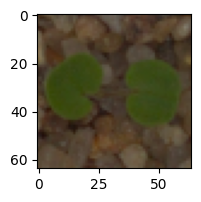

1/1 [==============================] - 0s 75ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


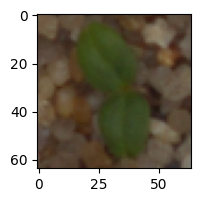

1/1 [==============================] - 0s 22ms/step
Predicted Label ['Cleavers']
True Label Cleavers


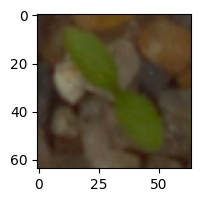

1/1 [==============================] - 0s 20ms/step
Predicted Label ['Common Chickweed']
True Label Common Chickweed


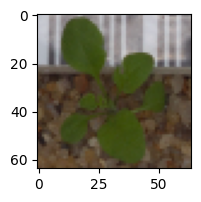

1/1 [==============================] - 0s 19ms/step
Predicted Label ['Shepherds Purse']
True Label Shepherds Purse


In [ ]:

# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],)
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[59].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[59])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

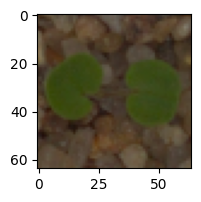

1/1 [==============================] - 0s 240ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


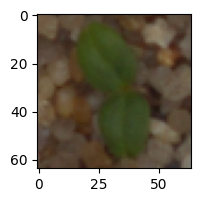

1/1 [==============================] - 0s 24ms/step
Predicted Label ['Cleavers']
True Label Cleavers


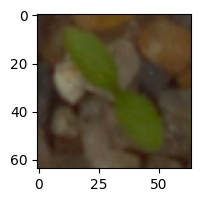

1/1 [==============================] - 0s 27ms/step
Predicted Label ['Common Chickweed']
True Label Common Chickweed


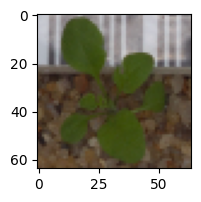

1/1 [==============================] - 0s 25ms/step
Predicted Label ['Shepherds Purse']
True Label Shepherds Purse


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model1.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model1.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],)
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model1.predict((X_test_normalized[59].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[59])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
## Complete the code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model1.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

**Actionable Insights**

- Model-2 has a significantly higher accuracy (0.77) than Model1 (0.35), indicating that it is better at correctly classifying the images in the test set.

- Model-2's precision and recall are more variable across the different classes, while Model-1's precision and recall are more consistent. This suggests that Model-2 may be more prone to overfitting or underfitting on certain classes.

- The F1-score is a more balanced measure of performance than accuracy, as it takes into account both precision and recall. In this case, Model2 has a higher F1-score (0.76) than Model1 (0.29). This suggests that Model-2 is a better overall classifier than Model1.

**Recommendations**

- Use Model-2 as the primary classifier for the task of classifying images, as it has a significantly higher accuracy than Model-1.

- Investigate potential overfitting or underfitting issues in Model2 by analyzing its performance on individual classes and taking corrective measures as needed.

- Consider employing data augmentation techniques to enrich the training dataset and mitigate overfitting concerns.

- Continuously monitor the performance of the classifier in production and retrain it periodically with updated data to maintain optimal accuracy.

- Explore the use of ensemble methods, combining multiple classifiers, to potentially achieve even better performance.